# Retail Strategy and Analytics

---

# Data Preparation

## Load required libraries

Note that you will need to install these libraries if you have never used these
before.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Load data with pandas

In [4]:
# Load transaction and customer data
transactionData = pd.read_excel('https://github.com/sabirinID/Quantium-Data-Analytics-Virtual-Internship/raw/main/Files/1-Data%20Preparation%20and%20Customer%20Analytics/QVI_transaction_data.xlsx')
customerData = pd.read_csv('https://github.com/sabirinID/Quantium-Data-Analytics-Virtual-Internship/raw/main/Files/1-Data%20Preparation%20and%20Customer%20Analytics/QVI_purchase_behaviour.csv')

---
## Data description

### Transaction data

| Feature Name | Description |
|--------------|-------------|
| DATE | Date of the transaction |
| STORE_NBR | Identification number of the store where the transaction took place |
| LYLTY_CARD_NBR | Loyalty card number of the customer |
| TXN_ID | Identification number of the transaction |
| PROD_NBR | Identification number of the product |
| PROD_NAME | Name of the product |
| PROD_QTY | Quantity of the product purchased in a single transaction |
| TOT_SALES | Total sales from the transaction |

### Customer data

| Feature Name | Description |
|--------------|-------------|
| LYLTY_CARD_NBR | Loyalty card number of the customer |
| LIFESTAGE | Life stage of the customer |
| PREMIUM_CUSTOMER | Indicates whether the customer is a premium customer or not |

---
## Exploratory data analysis

The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

### Examining transaction data

In [5]:
transactionData.shape

(264836, 8)

In [6]:
transactionData.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [7]:
# # Rename columns
# transactionData.rename(columns={
#     'DATE'          : 'transaction_date',
#     'STORE_NBR'     : 'store_id',
#     'LYLTY_CARD_NBR': 'loyalty_card_id',
#     'TXN_ID'        : 'transaction_id',
#     'PROD_NBR'      : 'product_id',
#     'PROD_NAME'     : 'product_name',
#     'PROD_QTY'      : 'product_quantity',
#     'TOT_SALES'     : 'total_sales'
#     }, inplace=True)

# Look at the first 10 rows
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


- Let's check if columns we would expect to be numeric are in numeric form and date
columns are in date format.

#### Examine transaction data

In [8]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


- We can see that the `DATE` column is in an integer format. Let's change this to a
date format.
- We should check that we are looking at the right products by examining `PROD_NAME`.

#### Convert `DATE` column to a date format

- A quick search online tells us that CSV and Excel integer dates begin on 30
Dec 1899.

In [9]:
# Convert 'DATE' column to datetime format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin='1899-12-30', unit='D')

transactionData['DATE'].describe()

count                           264836
mean     2018-12-30 00:52:12.879215616
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

#### Examine `PROD_NAME`

- Generate a summary of the `PROD_NAME` column.

In [10]:
transactionData['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [11]:
transactionData['PROD_NAME'].nunique()

114

In [12]:
transactionData['PROD_NAME'].value_counts(normalize=True).round(5)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      0.01248
Kettle Tortilla ChpsHny&Jlpno Chili 150g    0.01245
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    0.01234
Tyrrells Crisps     Ched & Chives 165g      0.01234
Cobs Popd Sea Salt  Chips 110g              0.01233
Kettle 135g Swt Pot Sea Salt                0.01230
Tostitos Splash Of  Lime 175g               0.01228
Infuzions Thai SweetChili PotatoMix 110g    0.01224
Smiths Crnkle Chip  Orgnl Big Bag 380g      0.01221
Thins Potato Chips  Hot & Spicy 175g        0.01219
Kettle Sensations   Camembert & Fig 150g    0.01215
Doritos Corn Chips  Cheese Supreme 170g     0.01215
Pringles Barbeque   134g                    0.01212
Doritos Corn Chip Mexican Jalapeno 150g     0.01210
Kettle Sweet Chilli And Sour Cream 175g     0.01208
Smiths Crinkle Chips Salt & Vinegar 330g    0.01207
Thins Chips Light&  Tangy 175g              0.01204
Dorito Corn Chp     Supreme 380g            0.01203
Pringles Sweet&Spcy BBQ 134g                0.01200
In

- Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name, `PROD_NAME`.
- Examine the words in `PROD_NAME` to see if there are any incorrect entries such as products that are not chips

In [13]:
# Extract product words
productWords = transactionData['PROD_NAME'].str.split().apply(pd.Series, 1).stack()
productWords.index = productWords.index.droplevel(-1)
productWords.name = 'words'

- As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words.

In [14]:
# Remove digits
productWords = productWords.str.replace(r'\d+', '', regex=True)

# Remove special characters
productWords = productWords.str.replace(r'[^\w\s]', '', regex=True)

# Remove empty spaces
productWords = productWords[productWords.str.replace(' ', '').str.isalpha()]

- Let's look at the most common words by counting the number of times a word
appears and sorting them by this frequency in order of highest to lowest frequency.

In [15]:
# Count the frequency of each word
wordCounts = productWords.value_counts().reset_index()
wordCounts.columns = ['words', 'frequency']

# Sort the distinct words by frequency of occurrence
wordCounts = wordCounts.sort_values(by='frequency', ascending=False)

In [16]:
# Remove all words that are alphabets, conjunctions, and prepositions
wordCounts = wordCounts[~wordCounts['words'].isin(['g', 'G', 'And', 'Of'])]

In [17]:
wordCounts.head(13)

,words,frequency
1,Chips,49770
2,Kettle,41288
3,Smiths,28860
4,Salt,27976
5,Cheese,27890
6,Pringles,25102
7,Doritos,24962
8,Crinkle,23960
9,Corn,22063
10,Original,21560


- There are `Salsa` products in the dataset but we are only interested in the chips
category, so let's remove these.

#### Remove `Salsa` products

In [18]:
# Remove salsa products
transactionData['Salsa'] = transactionData['PROD_NAME'].str.contains('Salsa', case=False)
transactionData = transactionData[~transactionData['Salsa']]
transactionData.drop('Salsa', axis=1, inplace=True)

- Next, we can use `describe()` to check summary statistics such as mean, min and max
values for each feature to see if there are any obvious outliers in the data and if
there are any nulls in any of the columns (`NA's : number of nulls` will appear in
the output if there are any nulls).

#### Summarise the data to check for nulls and possible outliers

In [19]:
transactionData.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


- There are no nulls in the columns but product quantity, `PROD_QTY`, appears to have an outlier which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

#### Filter the dataset to find the outlier

In [20]:
transactionData[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


- There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.
- Let's see if the customer has had other transactions.

In [21]:
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


- It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

#### Filter out the customer based on the loyalty card number

In [22]:
# Get the indices of the rows where 'LYLTY_CARD_NBR' is 226000
indices = transactionData[transactionData['LYLTY_CARD_NBR'] == 226000].index

# Drop the rows
transactionData.drop(indices, inplace=True)

#### Re-examine transaction data

In [23]:
transactionData['PROD_QTY'].describe()

count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

- That's better. Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.

#### Count the number of transactions by `DATE`

In [24]:
transactionData.groupby('DATE')['TXN_ID'].count()

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
2018-07-06    711
2018-07-07    695
2018-07-08    653
2018-07-09    692
2018-07-10    650
2018-07-11    701
2018-07-12    717
2018-07-13    727
2018-07-14    661
2018-07-15    712
2018-07-16    678
2018-07-17    694
2018-07-18    689
2018-07-19    637
2018-07-20    684
2018-07-21    683
2018-07-22    673
2018-07-23    673
2018-07-24    648
2018-07-25    674
2018-07-26    672
2018-07-27    697
2018-07-28    640
2018-07-29    659
2018-07-30    692
2018-07-31    688
2018-08-01    680
2018-08-02    669
2018-08-03    662
2018-08-04    665
2018-08-05    705
2018-08-06    706
2018-08-07    668
2018-08-08    695
2018-08-09    652
2018-08-10    675
2018-08-11    678
2018-08-12    642
2018-08-13    703
2018-08-14    702
2018-08-15    702
2018-08-16    690
2018-08-17    663
2018-08-18    683
2018-08-19    670
2018-08-20    644
2018-08-21    653
2018-08-22    689
2018-08-23    696
2018-08-24    647
2018-

#### Create a summary of transaction count by `DATE`.

In [25]:
transactionData.groupby('DATE')['TXN_ID'].count().describe()

count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: TXN_ID, dtype: float64

- There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

#### Create a sequence of dates and join this the count of transactions by `DATE`

In [26]:
# Create a date range from 1 July 2018 to 30 June 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Convert the date range to a DataFrame
date_df = pd.DataFrame(date_range, columns=['DATE'])

# Set the 'DATE' column as the index
date_df.set_index('DATE', inplace=True)

# Join the 'transactionData' DataFrame with the 'date_df' DataFrame
# using a left join. This will fill in missing days with NaN values.
transaction_date = transactionData.groupby('DATE').size()
transaction_date.name = 'TXN_SIZE'
joined_df = date_df.join(transaction_date, how='left')

# Reset the index
joined_df.reset_index(inplace=True)

In [27]:
joined_df.head(3)

,DATE,TXN_SIZE
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0


In [28]:
joined_df.tail(2)

,DATE,TXN_SIZE
363,2019-06-29,703.0
364,2019-06-30,704.0


In [29]:
joined_df[joined_df['TXN_SIZE'].isna() == True]

,DATE,TXN_SIZE
177,2018-12-25,NaN


- There were no transactions on 25 Dec 2018.
- This could be due to a variety of reasons, such as holidays, weekends, or the absence of any business activity on that specific day. It's also possible that there were no data entries for that day, which could be due to data collection, data entry, or data cleaning issues.

In [30]:
# Fill in the missing values with 0
joined_df.fillna(0, inplace=True)

#### Plot transactions over time

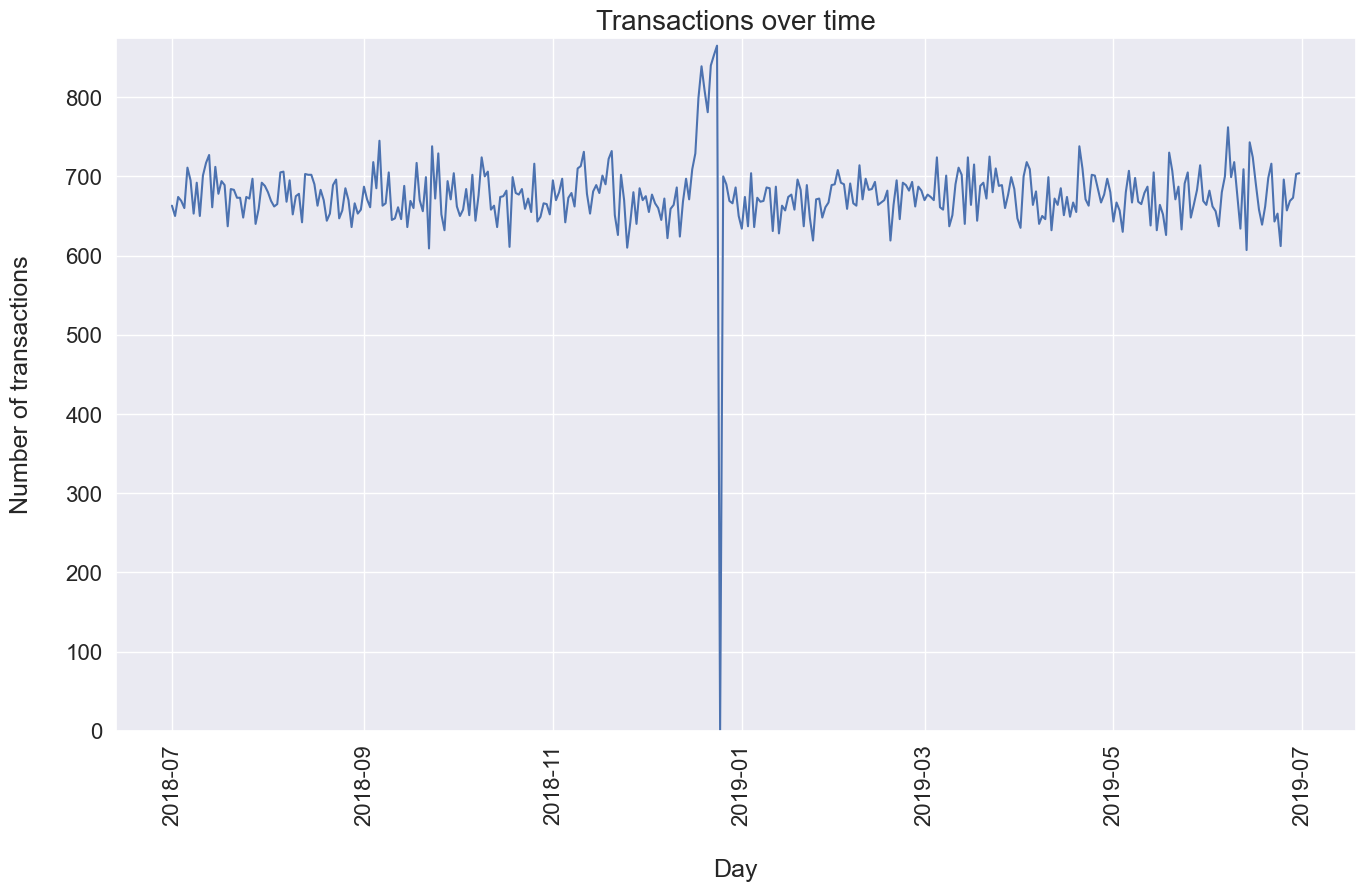

In [31]:
from matplotlib.dates import DateFormatter

txn_by_day = joined_df.copy()

# Create a figure
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(txn_by_day['DATE'], txn_by_day['TXN_SIZE'])
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Transactions over time', fontsize=20)
plt.xlabel('\nDay', fontsize=18)
plt.ylabel('Number of transactions\n', fontsize=18)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.ylim(0, 875)

plt.show()

- We can see that there is an increase in purchases in December and a break in late
December. Let's zoom in on this.

#### Filter to December and look at individual days

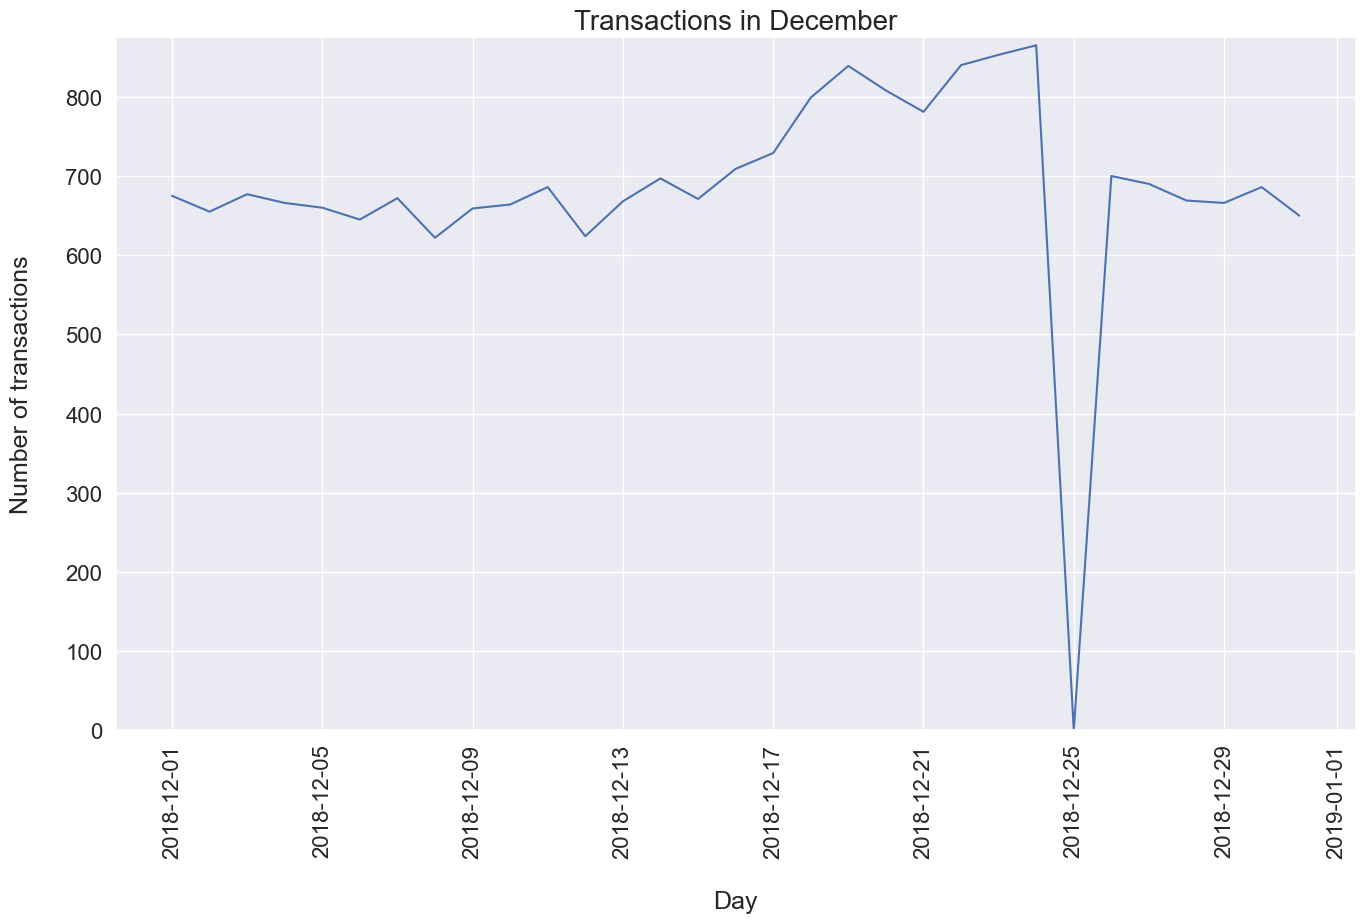

In [32]:
# Filter data to December
dec_data = txn_by_day.loc[txn_by_day['DATE'].dt.month == 12] # December

# Create a new figure
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(dec_data['DATE'], dec_data['TXN_SIZE'])
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))      # Show individual days
plt.title('Transactions in December', fontsize=20)
plt.xlabel('\nDay', fontsize=18)
plt.ylabel('Number of transactions\n', fontsize=18)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.ylim(0, 875)

plt.show()

- We can see that the **increase** in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.
- Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from `PROD_NAME`. We will
start with pack size.

#### Pack size

- We can work this out by taking the digits that are in `PROD_NAME`.

In [33]:
# Extract pack size
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)').astype(int)

- Let's check if the pack sizes look sensible.

In [34]:
transactionData['PACK_SIZE'].sort_values(ascending=False).unique()

array([380, 330, 270, 250, 220, 210, 200, 190, 180, 175, 170, 165, 160,
       150, 135, 134, 125, 110,  90,  70])

- The largest size is 380g and the smallest size is 70g - seems sensible!
- Let's plot a histogram of `PACK_SIZE` since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

In [35]:
# Define the bin edges
bins = [60, 150, 250, 350, np.inf]

# Define the labels for the bins
labels = ['60-150', '160-250', '260-350', '>350']

# Create the 'PACK_SIZE_GROUP' column
transactionData['PACK_SIZE_GROUP'] = pd.cut(transactionData['PACK_SIZE'], bins=bins, labels=labels)
transactionData['PACK_SIZE_GROUP'].value_counts(normalize=True).round(4)

PACK_SIZE_GROUP
160-250    0.5049
60-150     0.3928
260-350    0.0763
>350       0.0260
Name: proportion, dtype: float64

#### Plot a histogram showing the number of transactions by `PACK_SIZE`

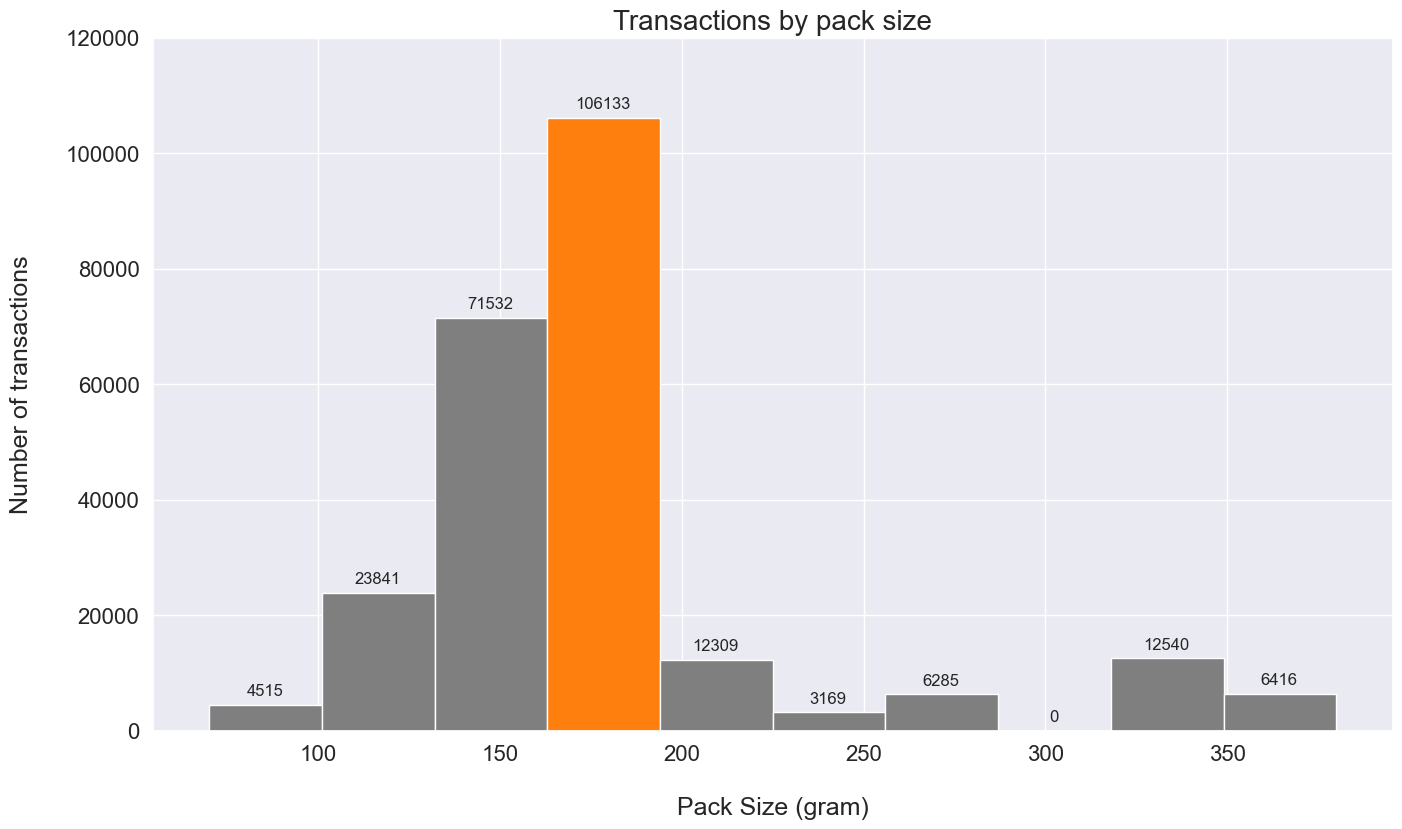

In [36]:
# Create a histogram of 'PACK_SIZE'
plt.figure(figsize=(16, 9))
n, bins, patches = plt.hist(transactionData['PACK_SIZE'], bins=10, color='tab:gray')

# Find the bin with the highest frequency
max_bin = np.argmax(n)

# Change the color of the highest bin to orange
patches[max_bin].set_facecolor('tab:orange')

# Add annotations for each bin
for i in range(len(n)):
    plt.annotate(round(n[i]), (bins[i], n[i]), textcoords='offset points',
                 xytext=(40, 10), ha='center', va='center')

plt.title('Transactions by pack size', fontsize=20)
plt.xlabel('\nPack Size (gram)', fontsize=18)
plt.ylabel('Number of transactions\n', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 120000)

plt.show()

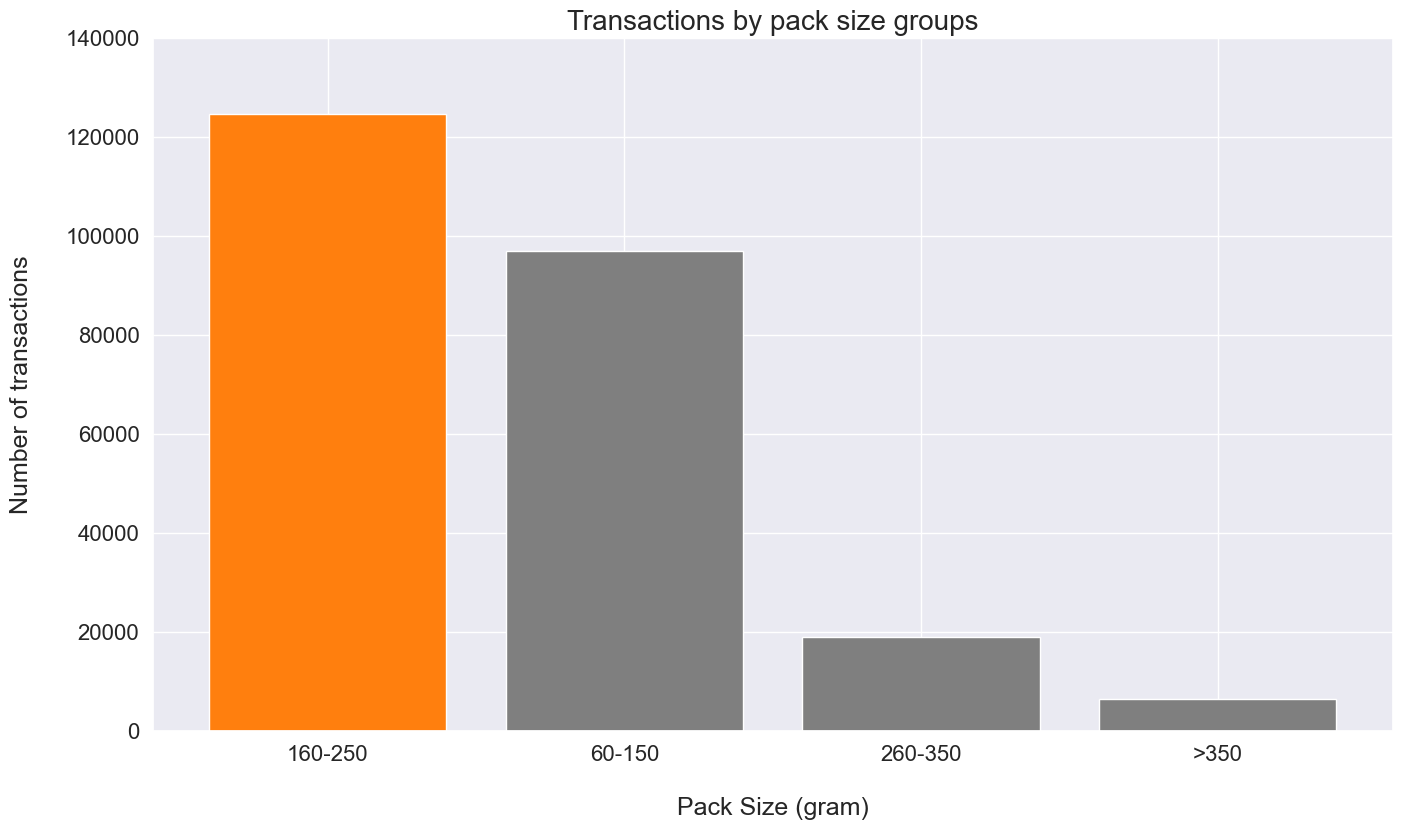

In [37]:
pack_size_counts = transactionData['PACK_SIZE_GROUP'].value_counts()
colors = ['tab:orange' if x == pack_size_counts.max() else 'tab:gray' for x in pack_size_counts]


# Create a bar chart of 'PACK_SIZE_GROUP'
plt.figure(figsize=(16, 9))
plt.bar(pack_size_counts.index, pack_size_counts, color=colors)

plt.title('Transactions by pack size groups', fontsize=20)
plt.xlabel('\nPack Size (gram)', fontsize=18)
plt.ylabel('Number of transactions\n', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 140000)

plt.show()

- Pack sizes created look reasonable.
- Now to create brands, we can use the first word in `PROD_NAME` to work out the brand
name.

#### Brands

- Create a column which contains the brand of the product, by
extracting it from the product name, `PROD_NAME`.

In [38]:
# Extract brand names
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0]

- Check the results look reasonable.

In [39]:
transactionData['BRAND'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

- Some of the brand names look like they are of the same brands - such as Red and
RRD, which are both Red Rock Deli chips. Let's combine these together.

#### Clean brand names

In [40]:
# Define a dict that maps original brand names to new brand names
brand_map = {
    'Burger' : 'Burger Rings',
    'Dorito' : 'Doritos',
    'French' : 'French Fries',
    'Grain'  : 'Sunbites',
    'GrnWves': 'Sunbites',
    'Snbts'  : 'Sunbites',
    'Infzns' : 'Infuzions',
    'Natural': 'NCC', # Natural Chip Co
    'Red'    : 'RRD', # Red Rock Deli
    'Smith'  : 'Smiths',
    'WW'     : 'Woolworths'
}

# Replace brand names
transactionData['BRAND'] = transactionData['BRAND'].replace(brand_map)

#### Check again



In [41]:
transactionData['BRAND'].sort_values().unique()

array(['Burger Rings', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French Fries', 'Infuzions', 'Kettle', 'NCC', 'Pringles', 'RRD',
       'Smiths', 'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells',
       'Woolworths'], dtype=object)

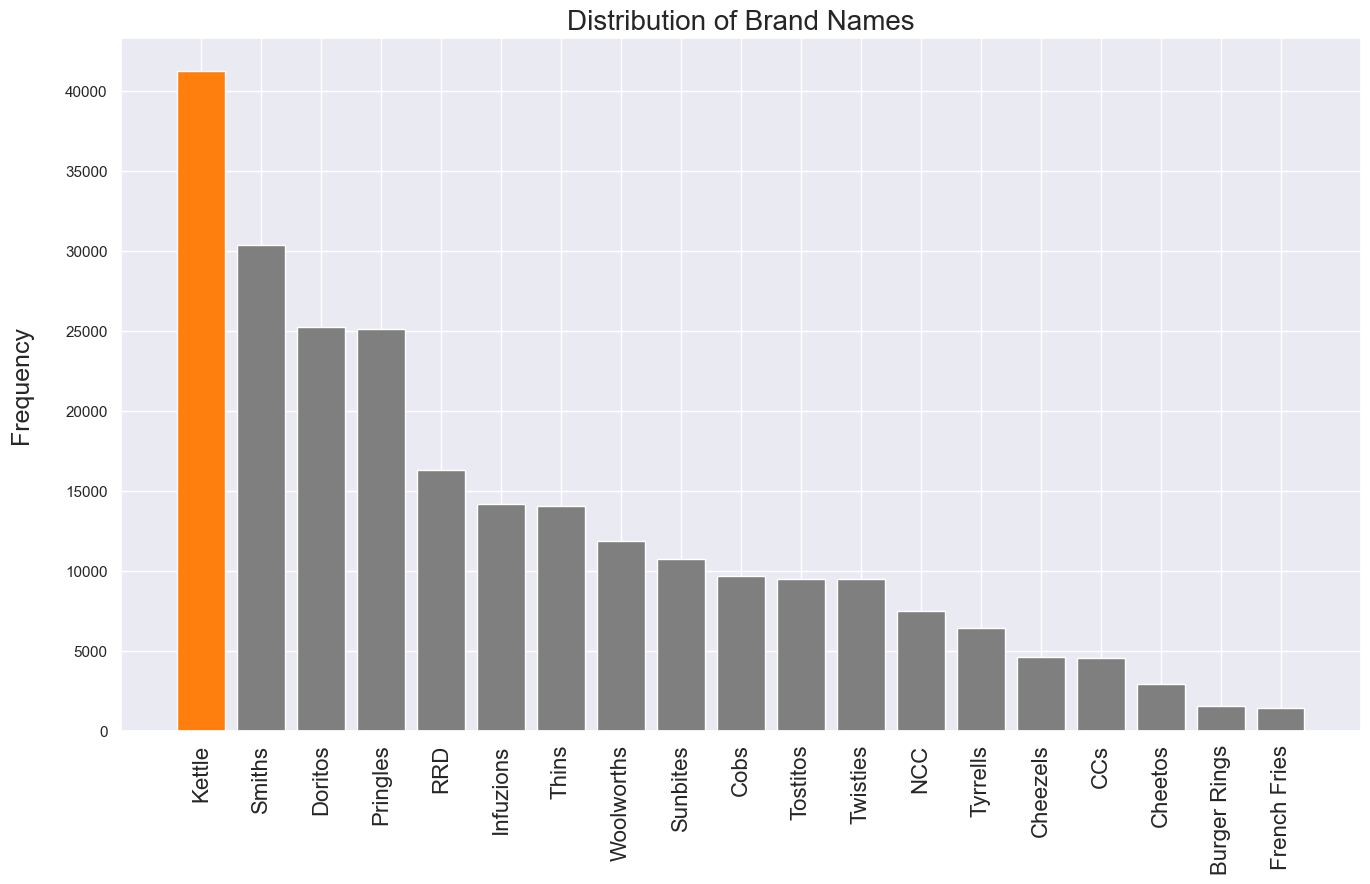

In [42]:
brand_counts = transactionData['BRAND'].value_counts()
colors = ['tab:orange' if x == brand_counts.max() else 'tab:gray' for x in brand_counts]

plt.figure(figsize=(16, 9))
plt.bar(brand_counts.index, brand_counts, color=colors)

plt.title('Distribution of Brand Names', fontsize=20)
plt.xticks(fontsize=16, rotation=90)
plt.xlabel('')
plt.ylabel('Frequency\n', fontsize=18)

plt.show()

### Examining customer data

- Now that we are happy with the transaction dataset, let's have a look at the
customer dataset.
- Do some basic summaries of the dataset, including distributions of
any key columns.

In [43]:
customerData.shape

(72637, 3)

In [44]:
customerData.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [45]:
# # Rename columns
# customerData.rename(columns={
#     'LYLTY_CARD_NBR'  : 'loyalty_card_id',
#     'LIFESTAGE'       : 'customer_life_stage',
#     'PREMIUM_CUSTOMER': 'premium_customer'
#     }, inplace=True)

# Look at the first 10 rows
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


#### Examine customer data

In [46]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#### Merge transaction data to customer data

In [47]:
# Merge transactionData and customer_data
data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')
data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_SIZE_GROUP,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,160-250,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,160-250,CCs,MIDAGE SINGLES/COUPLES,Budget


- As the number of rows in `data` is the same as that of `transactionData`, we can be
sure that no duplicates were created. This is because we created `data` by setting
`how='left'` (in other words, a left join) which means take all the rows in
`transactionData` and find rows with matching values in shared columns and then
joining the details in these rows to the first mentioned table.
- Let's also check if some customers were not matched on by checking for nulls.

In [48]:
# Check for duplicates
data[data.duplicated() == True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_SIZE_GROUP,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,160-250,Smiths,OLDER SINGLES/COUPLES,Premium


In [49]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [50]:
# Recheck for duplicates
data.duplicated().sum()

0

#### Check for missing customer details

- See if any transactions did not have a matched customer.

In [51]:
# Check for missing values
data.isna().sum().sum()

0

- Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

#### Export the dataset

In [52]:
# Save to CSV
data.to_csv('QVI_data.csv', index=False)

- Data exploration is now complete!

---

## Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

Let's start with calculating total sales by `LIFESTAGE` and `PREMIUM_CUSTOMER` and plotting the split by these segments to describe which customer segment contribute most to chip sales.

#### Total sales by `LIFESTAGE` and `PREMIUM_CUSTOMER`

- Calculate the summary of sales by those dimensions and create a
plot.

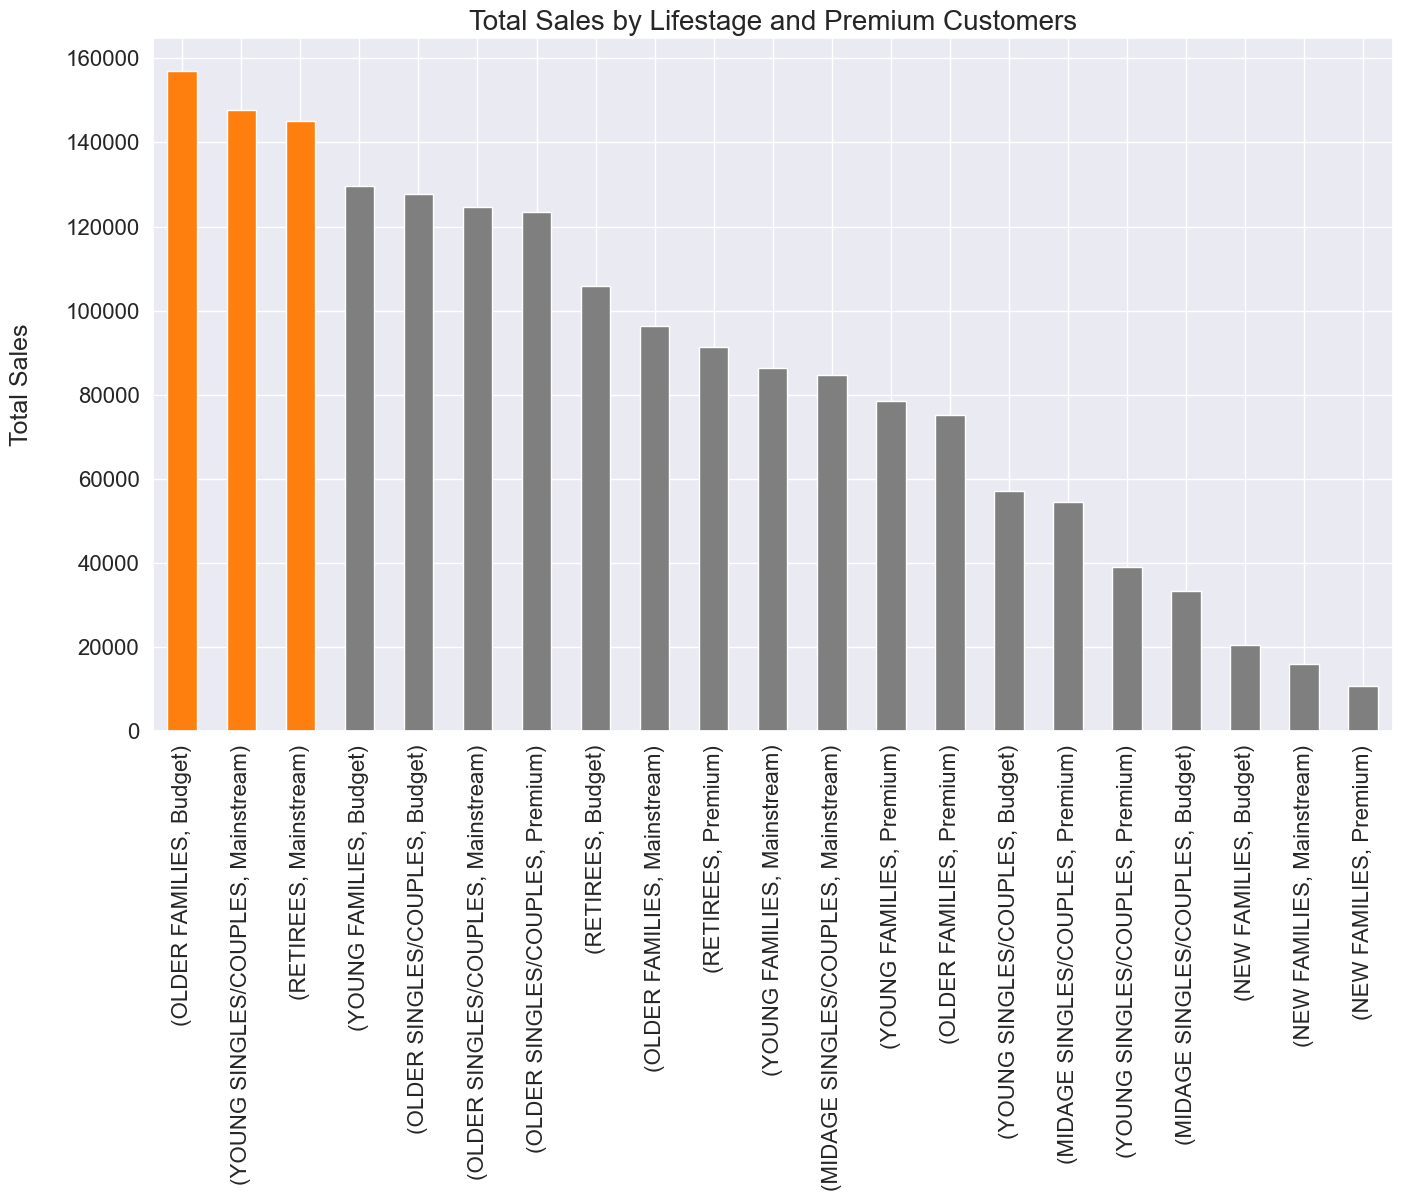

In [53]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER and calculate the sum of TOT_SALES
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Sort the results
sales_by_segment_sorted = sales_by_segment.sort_values(ascending=False)

# Create the color list
colors = ['tab:orange' if i < 3 else 'tab:gray' for i in range(len(sales_by_segment_sorted))]

# Plot the data
plt.figure(figsize=(16, 9))
sales_by_segment_sorted.plot(kind='bar', fontsize=16, rot=90, color=colors)
plt.title('Total Sales by Lifestage and Premium Customers', fontsize=20)
plt.xlabel('')
plt.ylabel('Total Sales\n', fontsize=18)

plt.show()

- Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees.
- Let's see if the higher sales are due to there being more customers who buy chips.

#### Number of customers by `LIFESTAGE` and `PREMIUM_CUSTOMER`

- Calculate the summary of number of customers by those dimensions and create a plot.

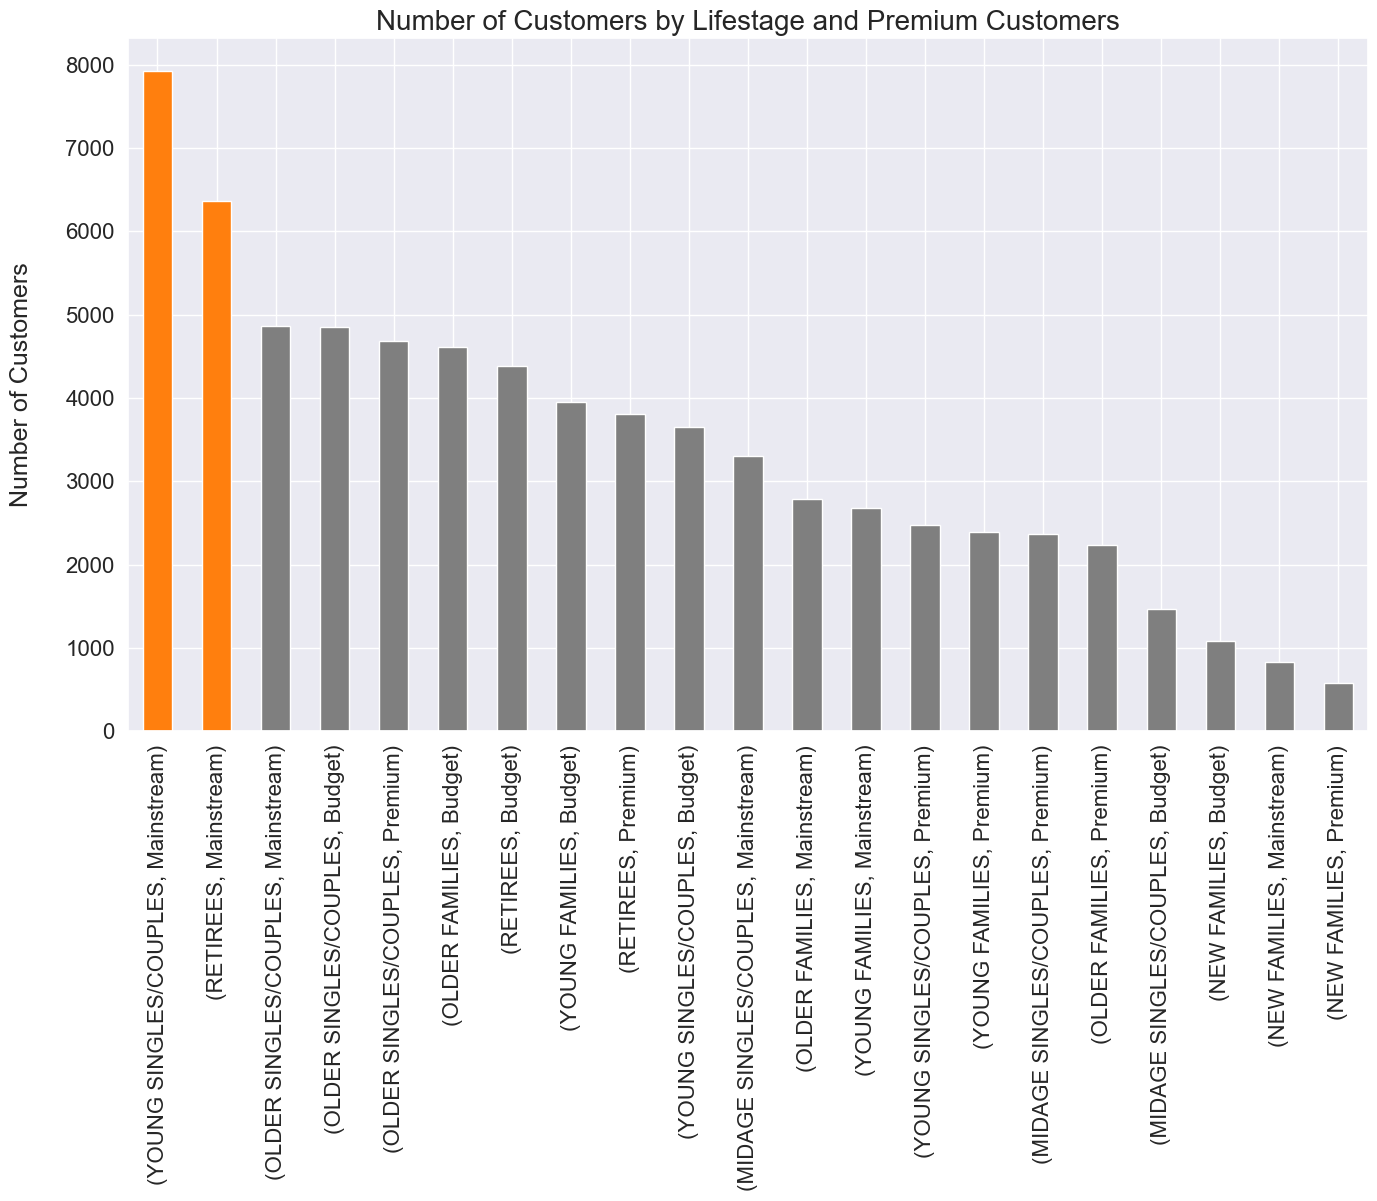

In [54]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER and count the number of unique LYLTY_CARD_NBR
customers_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

# Sort the results
customers_by_segment_sorted = customers_by_segment.sort_values(ascending=False)

# Create the color list
colors = ['tab:orange' if i < 2 else 'tab:gray' for i in range(len(customers_by_segment_sorted))]

# Plot the data
plt.figure(figsize=(16, 9))
customers_by_segment_sorted.plot(kind='bar', fontsize=16, rot=90, color=colors)
plt.title('Number of Customers by Lifestage and Premium Customers', fontsize=20)
plt.xlabel('')
plt.ylabel('Number of Customers\n', fontsize=18)

plt.show()


- There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.
- Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

#### Average number of units per customer by `LIFESTAGE` and `PREMIUM_CUSTOMER`

- Calculate and plot the average number of units per customer by those two dimensions.

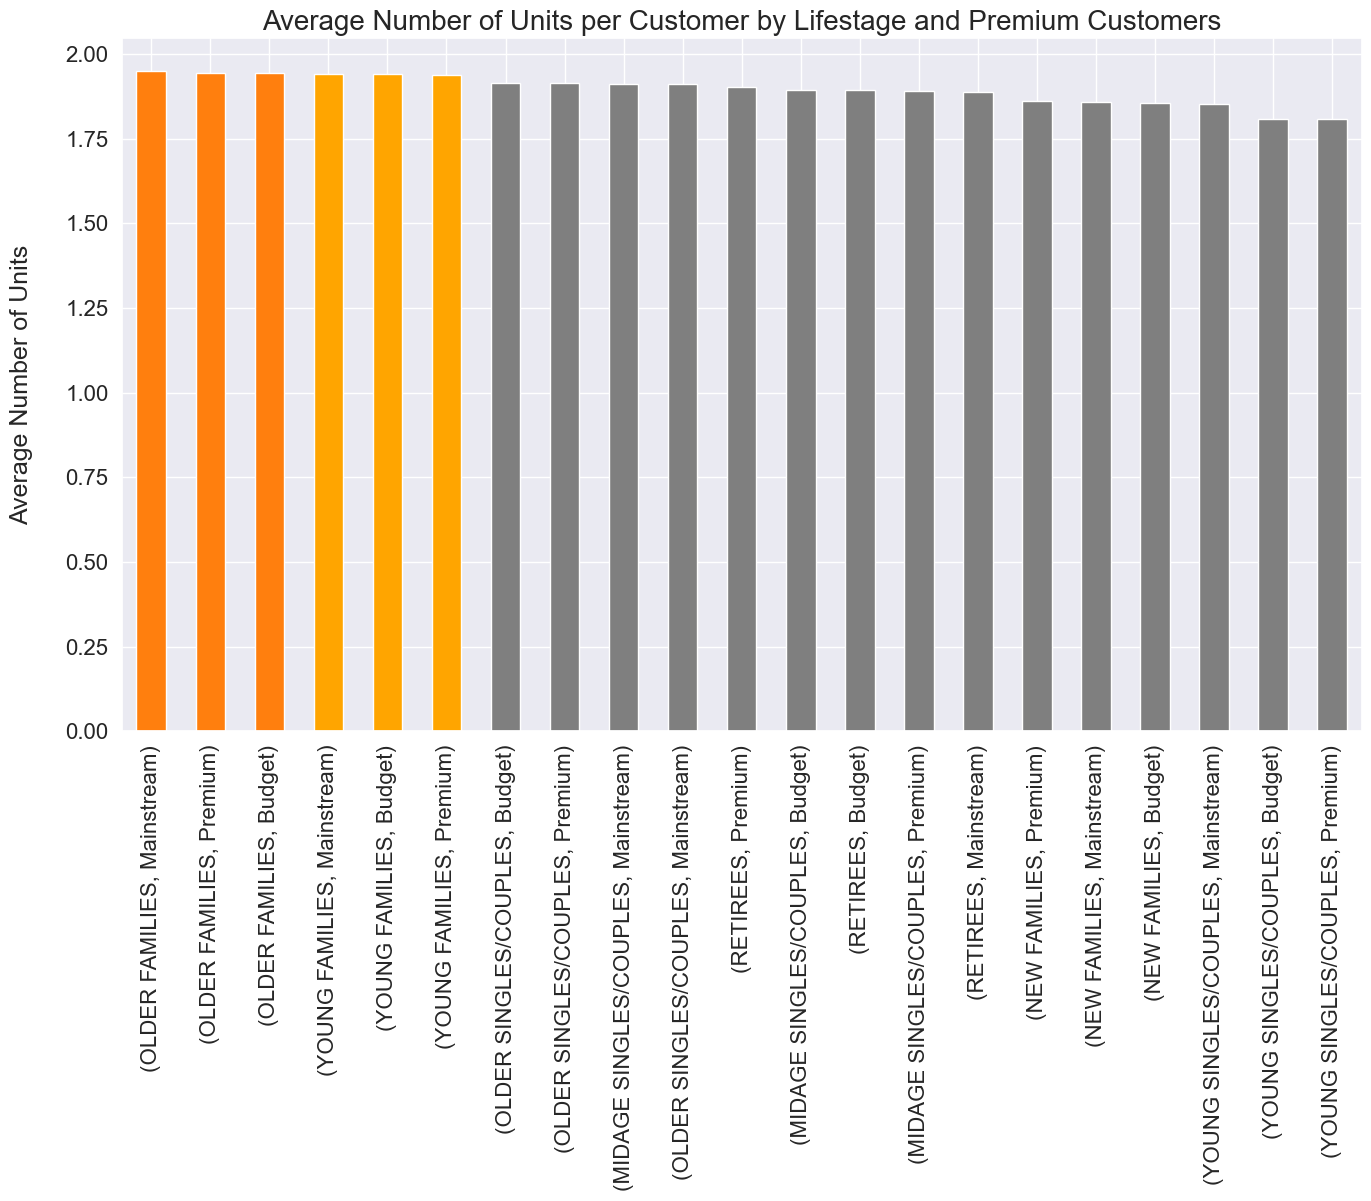

In [55]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER and calculate the mean of PROD_QTY
average_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean()

# Sort the results
average_units_per_customer_sorted = average_units_per_customer.sort_values(ascending=False)

# Create the color list
colors = ['tab:orange' if i < 3 else 'orange' if i >= 3 and i < 6 else 'tab:gray' for i in range(len(average_units_per_customer_sorted))]

# Plot the data
plt.figure(figsize=(16, 9))
average_units_per_customer_sorted.plot(kind='bar', fontsize=16, rot=90, color=colors)
plt.title('Average Number of Units per Customer by Lifestage and Premium Customers', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Number of Units\n', fontsize=18)

plt.show()


- Older families and young families in general buy more chips per customer.
- Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

#### Average price per unit by `LIFESTAGE` and `PREMIUM_CUSTOMER`

- Calculate and plot the average price per unit sold (average sale
price) by those two customer dimensions.

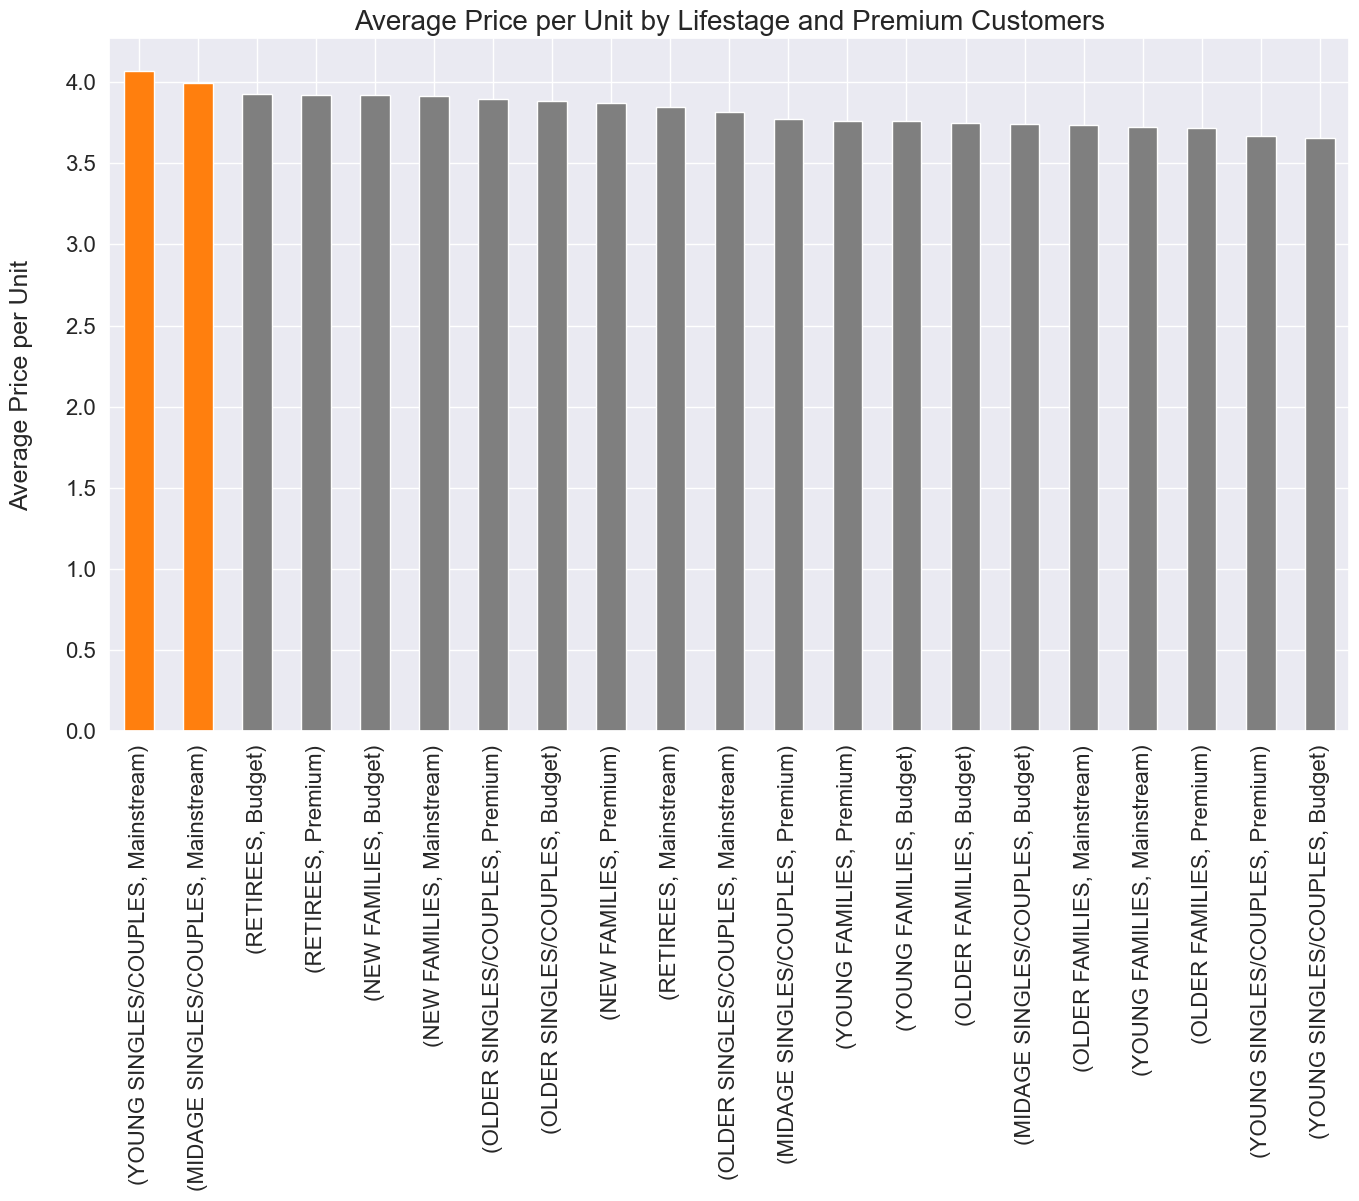

In [56]:
# The unit price can be calculated by dividing the TOT_SALES by PROD_QTY
data['UNIT_PRICE'] = data['TOT_SALES'] / data['PROD_QTY']

# Group the data by LIFESTAGE and PREMIUM_CUSTOMER and calculate the mean of UNIT_PRICE
average_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean()

# Sort the results
average_price_per_unit_sorted = average_price_per_unit.sort_values(ascending=False)

# Create the color list
colors = ['tab:orange' if i < 2 else 'tab:gray' for i in range(len(customers_by_segment_sorted))]

# Plot the data
plt.figure(figsize=(16, 9))
average_price_per_unit_sorted.plot(kind='bar', fontsize=16, rot=90, color=colors)
plt.title('Average Price per Unit by Lifestage and Premium Customers', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Price per Unit\n', fontsize=18)

plt.show()

- Mainstream young and midage singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

- As the difference in average price per unit isn't large, we can check if this difference is statistically different.

#### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

- Perform a t-test to see if the difference is significant.

In [57]:
from scipy.stats import ttest_ind

# Filter the data
mainstream = data[(data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
premium = data[(data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Premium')]
budget = data[(data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Budget')]

# Perform the t-test
t_stat, p_val = ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'])
print(f'Mainstream vs Premium: t = {t_stat}, p = {p_val}')

t_stat, p_val = ttest_ind(mainstream['TOT_SALES'], budget['TOT_SALES'])
print(f'Mainstream vs Budget : t = {t_stat}, p = {p_val}')

t_stat, p_val = ttest_ind(premium['TOT_SALES'], budget['TOT_SALES'])
print(f'Premium vs Budget    : t = {t_stat}, p = {p_val}')

Mainstream vs Premium: t = 24.77672858209525, p = 1.3358339199035904e-134
Mainstream vs Budget : t = 29.37968796720024, p = 6.642280216613805e-188
Premium vs Budget    : t = 3.893400294889745, p = 9.908894718247683e-05


Based on the t-test results:

- The p-value between `Mainstream` and `Premium` is 1.3358339199035904e-134.
- The p-value between `Mainstream` and `Budget` is 6.642280216613805e-188.
- The p-value between `Premium` and `Budget` is 9.908894718247683e-05.

Since all p-values are less than 0.05, we **reject the null hypothesis** that there's no significant difference between the groups.

So, the unit price for mainstream, young and midage singles and couples **ARE** significantly higher than that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at `Mainstream` - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

#### Deep dive into `Mainstream`, young singles/couples

- Work out of there are brands that these two customer segments prefer more than others. We could use a technique called affinity analysis or a-priori analysis.

In [58]:
# Filter the data for Mainstream, young singles/couples
mainstream_young = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count the frequency of each brand
brand_mainstream_young = mainstream_young['BRAND'].value_counts()

brand_mainstream_young.head()

BRAND
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: count, dtype: int64

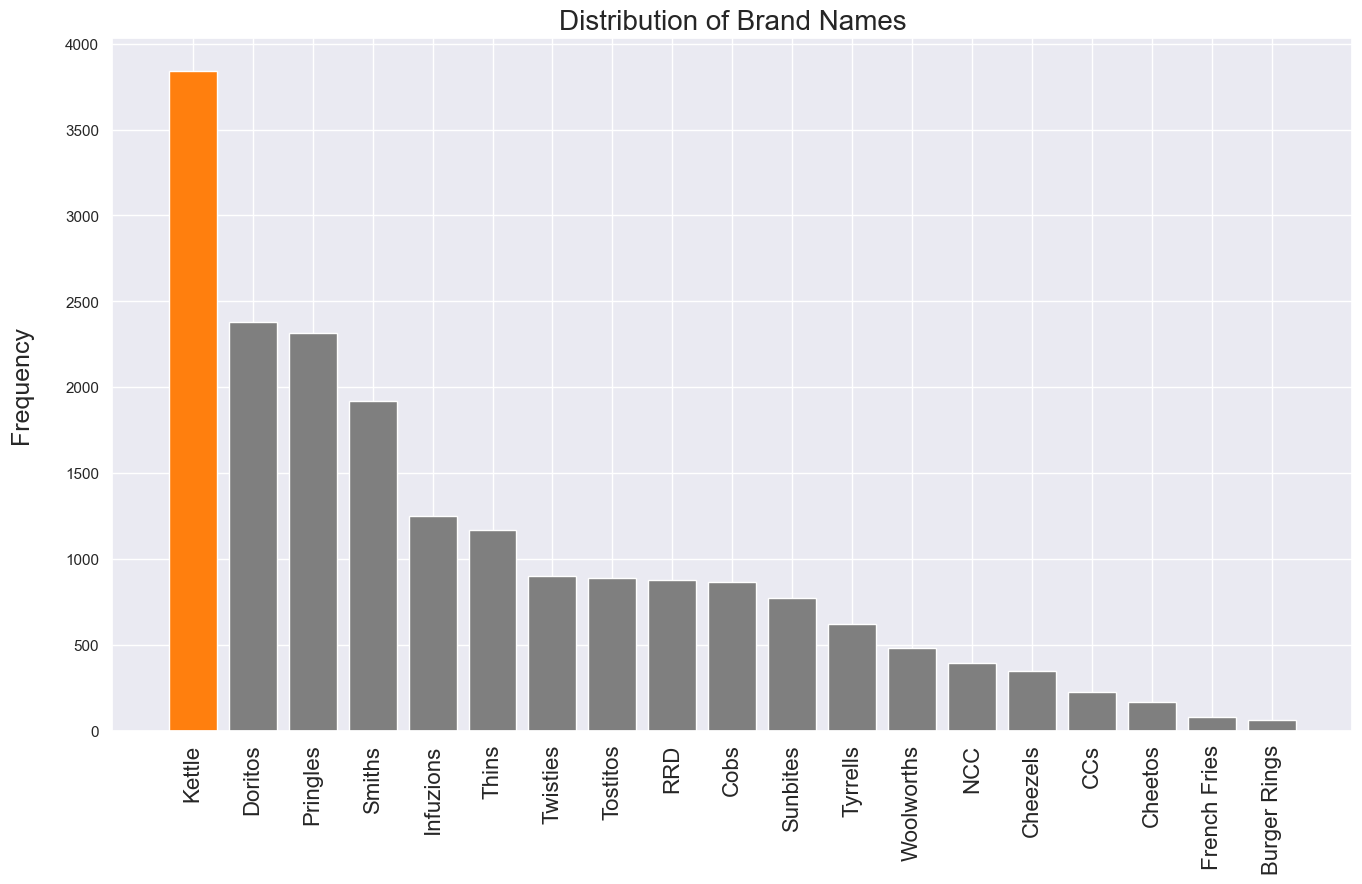

In [59]:
colors = ['tab:orange' if x == brand_mainstream_young.max() else 'tab:gray' for x in brand_mainstream_young]

plt.figure(figsize=(16, 9))
plt.bar(brand_mainstream_young.index, brand_mainstream_young, color=colors)

plt.title('Distribution of Brand Names', fontsize=20)
plt.xticks(fontsize=16, rotation=90)
plt.xlabel('')
plt.ylabel('Frequency\n', fontsize=18)

plt.show()

In [60]:
# pip install mlxtend

In [61]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group the data by transaction ID and convert each group into a list
transactions = mainstream_young.groupby('TXN_ID')['BRAND'].apply(list)

# Convert the list of lists into a DataFrame
transactions = pd.DataFrame(transactions.tolist(), index=transactions.index)

# Use the apriori function to find frequently occurring itemsets
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)

# Use the association_rules function to find rules with a high lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Print the rules sorted by lift in descending order
print(rules.sort_values(by='lift', ascending=False))

c:\Users\ASUS\miniconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value RRD

We can see that :

[INSIGHTS]

Let's also find out if our target segment tends to buy larger packs of chips.

#### Preferred pack size compared to the rest of the population

[INSIGHTS]